In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train

array([[ 0.04446722,  0.91377162, -0.14972402, ...,  0.57407122,
        -0.66673831,  1.58983898],
       [ 0.41722807, -0.74594213,  0.6030946 , ..., -0.61453878,
         0.30463008,  0.75341946],
       [ 0.83868939,  0.86018264,  0.66388059, ...,  0.72508104,
        -1.17953018, -1.15545179],
       ...,
       [ 0.04091467,  0.42796263, -0.00235298, ..., -1.92277177,
        -0.17104772,  1.63925652],
       [ 0.3393792 , -0.64015446,  0.25253995, ..., -1.39922826,
        -0.52991248, -0.7348109 ],
       [ 1.84815207, -0.31305803,  1.78069642, ...,  0.60451533,
        -1.56102804, -1.25040773]])

In [3]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [18]:
def conf_matrix(y_pred,y_true):
    tp=np.sum((y_true==1) & (y_pred==1))
    tn=np.sum((y_true==0) & (y_pred==0))
    fp=np.sum((y_true==0) & (y_pred==1))
    fn=np.sum((y_true==1) & (y_pred==0))
    return tp,tn,fp,fn
def acc(tp,tn,fp,fn):
    return (tp+tn)/(tp+tn+fp+fn)
def sen(tp,tn,fp,fn):
    return (tp)/(tp+fn)
def prec(tp,tn,fp,fn):
    return (tp)/(tp+fp)
def f1(tp,tn,fp,fn):
    preci=prec(tp,tn,fp,fn)
    reci=sen(tp,tn,fp,tn)
    return (2*preci*reci)/(preci+reci)
def speci(TP,TN, FP,FN):
    return TN / (TN + FP) if (TN + FP) != 0 else 0

def npv(TP,TN, FP,FN):
    return TN / (TN + FN) if (TN + FN) != 0 else 0
def mcc(TP, TN, FP, FN):
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    return numerator / denominator if denominator != 0 else 0
tp,tn,fp,fn=conf_matrix(y_pred,y_test)
print("Accuracy is :",acc(tp,tn,fp,fn))
print(sen(tp,tn,fp,fn))
print(prec(tp,tn,fp,fn))
print(npv(tp,tn,fp,fn))

Accuracy is : 0.8466666666666667
0.8242424242424242
0.8888888888888888
0.8027210884353742


In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score,roc_curve,confusion_matrix,auc

# Calculate metrics using sklearn
sklearn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "MCC": matthews_corrcoef(y_test, y_pred),
    "Specificity": confusion_matrix(y_test, y_pred).ravel()[1] / confusion_matrix(y_test, y_pred).ravel()[2],
    "NPV": confusion_matrix(y_test, y_pred).ravel()[3] / confusion_matrix(y_test, y_pred).ravel()[0]
}

sklearn_metrics

{'Accuracy': 0.8466666666666667,
 'Precision': 0.8888888888888888,
 'Recall (Sensitivity)': 0.8242424242424242,
 'F1-Score': 0.8553459119496855,
 'MCC': 0.6949551478806616,
 'Specificity': 0.5862068965517241,
 'NPV': 1.152542372881356}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


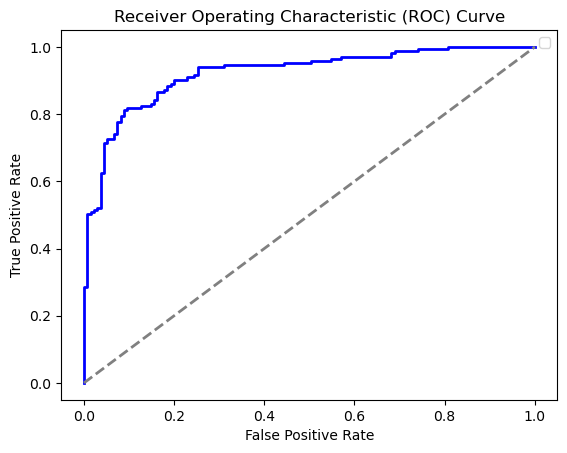

AUC: 0.92


In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print the AUC
print(f"AUC: {roc_auc:.2f}")